In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

In [2]:
#Import tables from Data and convert them to dataframes.
reveal_data =  pd.read_csv("Data/Reveal_EEO1_for_2016.csv")
tech_sector_data = pd.read_csv("Data/Tech_sector_diversity_demographics_2016.csv")
reveal_data_df = pd.DataFrame(reveal_data)
tech_sector_data_df = pd.DataFrame(tech_sector_data)

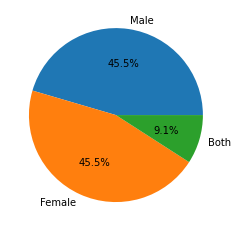

In [3]:
# Gender Breakdown: Run basic calculations
gender_data = tech_sector_data_df.groupby("job_category")["count"].sum().to_frame().reset_index()
gender_data = tech_sector_data_df.groupby("gender")["count"].sum().to_frame().reset_index()

tech_sector_data_df = tech_sector_data_df[tech_sector_data_df["job_category"].isin(["Professionals", "Managers","Executives"])]
tech_sector_data_df = tech_sector_data_df[tech_sector_data_df["gender"].isin(["Female", "Male","Both"])]

counts =tech_sector_data_df.gender.value_counts()
plt.pie(counts.values,labels=counts.index.values,autopct='%1.1f%%')

plt.show()

In [4]:
# #Convert count column's values to numeric in reveal_data_df

reveal_data_df = reveal_data_df.loc[reveal_data_df["count"] != "na",:]
reveal_data_df["count"]= pd.to_numeric(reveal_data_df["count"])
reveal_data_df  

,company,year,race,gender,job_category,count
0,23andMe,2016,Hispanic_or_Latino,male,Executives,0
1,23andMe,2016,Hispanic_or_Latino,male,Managers,1
2,23andMe,2016,Hispanic_or_Latino,male,Professionals,7
3,23andMe,2016,Hispanic_or_Latino,male,Technicians,0
4,23andMe,2016,Hispanic_or_Latino,male,Sales workers,0
...,...,...,...,...,...,...
4495,Sanmina,2016,Overall_totals,NaN,laborers and helpers,4
4496,Sanmina,2016,Overall_totals,NaN,Service workers,57
4497,Sanmina,2016,Overall_totals,NaN,Totals,5205
4498,Sanmina,2016,Overall_totals,NaN,Previous_totals,5615


In [5]:
profession_data = reveal_data_df[reveal_data_df["job_category"].isin(["Professionals", "Managers","Executives"])]
gender_data = profession_data[profession_data["gender"].isin(["male","female"])]
# Female data
female_data_df = gender_data[gender_data["gender"]=="female"]

#Male data
male_data_df = gender_data[gender_data["gender"]=="male"]
gender_data

,company,year,race,gender,job_category,count
0,23andMe,2016,Hispanic_or_Latino,male,Executives,0
1,23andMe,2016,Hispanic_or_Latino,male,Managers,1
2,23andMe,2016,Hispanic_or_Latino,male,Professionals,7
12,23andMe,2016,Hispanic_or_Latino,female,Executives,0
13,23andMe,2016,Hispanic_or_Latino,female,Managers,1
...,...,...,...,...,...,...
4465,Sanmina,2016,White,female,Professionals,230
4475,Sanmina,2016,White,female,Managers,124
4476,Sanmina,2016,White,male,Executives,93
4477,Sanmina,2016,White,male,Professionals,533


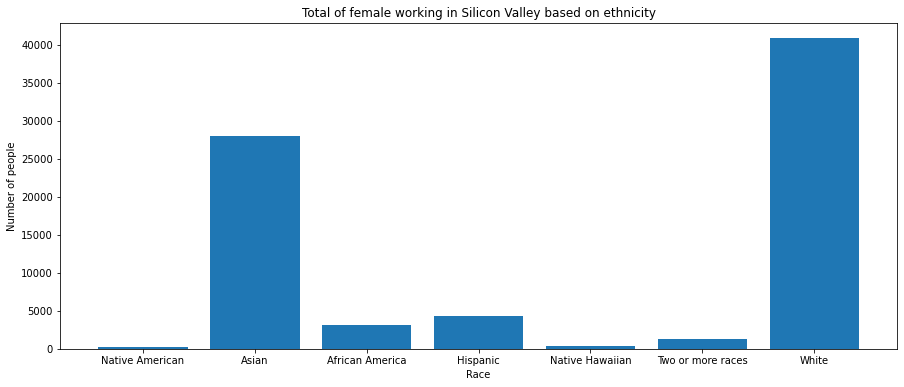

<Figure size 432x288 with 0 Axes>

In [6]:
race_data =female_data_df.groupby("race")["count"]
race_data_plot = race_data.sum().to_frame().reset_index()


race_amount = race_data_plot["count"]
race_labels = ("Native American", "Asian", "African America", "Hispanic","Native Hawaiian", "Two or more races", "White")

plt.figure(figsize=(15,6))
plt.bar(race_labels, race_amount)
plt.xlabel("Race")
plt.ylabel("Number of people")
plt.title("Total of female working in Silicon Valley based on ethnicity")

plt.show()
plt.tight_layout()


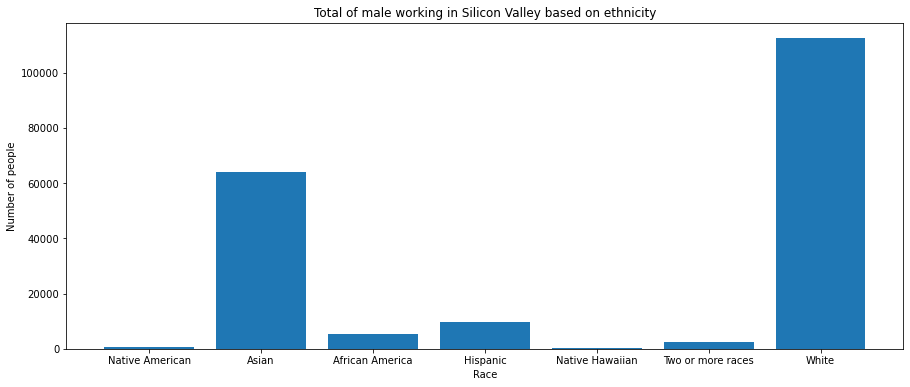

<Figure size 432x288 with 0 Axes>

In [7]:
race_data =male_data_df.groupby("race")["count"]
race_data_plot = race_data.sum().to_frame().reset_index()

race_amount = race_data_plot["count"]
race_labels = ("Native American", "Asian", "African America", "Hispanic","Native Hawaiian", "Two or more races", "White")

plt.figure(figsize=(15,6))
plt.bar(race_labels, race_amount)
plt.xlabel("Race")
plt.ylabel("Number of people")
plt.title("Total of male working in Silicon Valley based on ethnicity")

plt.show()
plt.tight_layout()


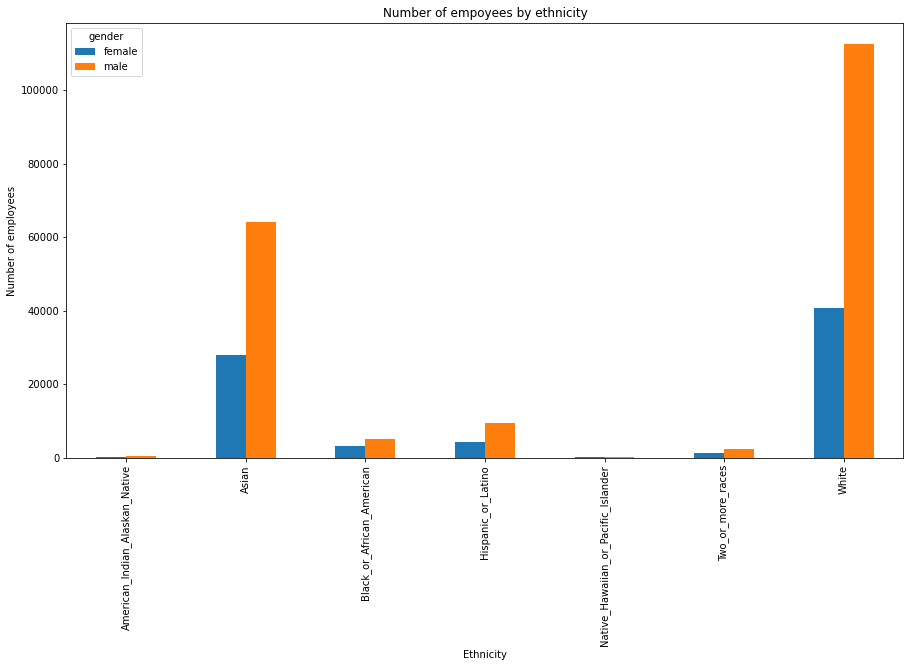

In [8]:
#Create bar chart showing number of male and female by ethnicity.


gender_race = gender_data.groupby(["race","gender"])["count"].sum().reset_index()


gender_race.pivot(index = "race",columns = "gender", values = "count").plot(kind="bar",figsize = (15,8))

plt.xlabel ("Ethnicity")
plt.ylabel ("Number of employees")
plt.title("Number of empoyees by ethnicity")

plt.show()

([<matplotlib.patches.Wedge at 0x213e0656ba8>,
 [Text(0.7456371575451173, 0.9402261585852831, 'Female'),
  Text(-0.6835007277496908, -0.8618739787031763, 'Male')],
 [Text(0.4349550085679851, 0.5484652591747484, '28.7%'),
  Text(-0.37281857877255864, -0.47011307929264157, '71.3%')])

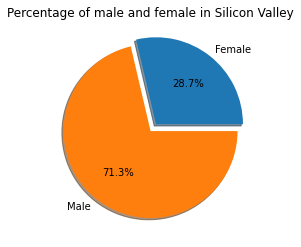

In [9]:
# #Create pie chart to show difference betwwen male and femle representation.
# number_gender = gender_data.groupby ("gender")["count"].sum().to_frame()
# pie_data = number_gender['count']

# labels = ("Female", "Male")
# explode = (0.1, 0)
# number_gender

# plt.title("Percentage of male and female in Silicon Valley")
# plt.pie(pie_data, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True)



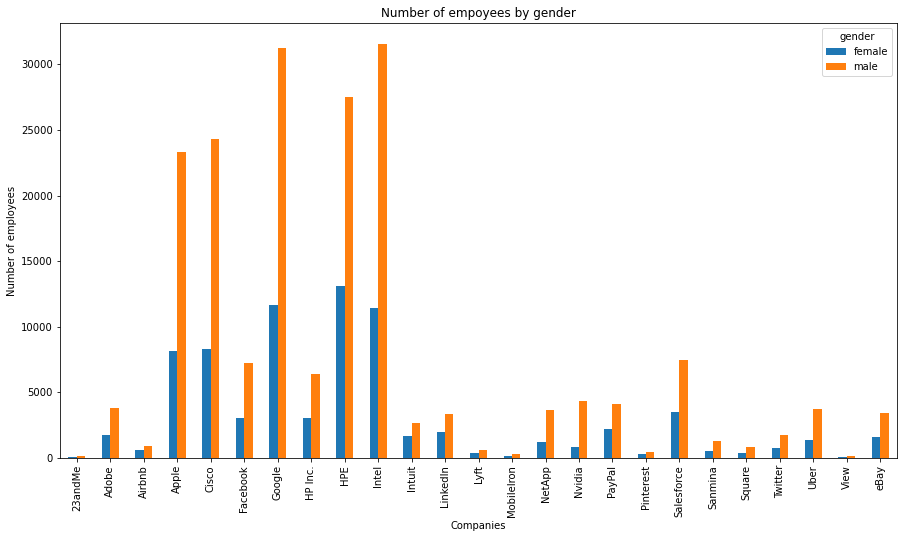

In [10]:

gender_per_company = gender_data.groupby(["company","gender"])["count"].sum().reset_index()
gender_per_company.pivot(index = "company",columns = "gender", values = "count").plot(kind="bar",figsize = (15,8))

plt.xlabel ("Companies")
plt.ylabel ("Number of employees")
plt.title("Number of empoyees by gender")

plt.show()


